# Customer Churn Prediction using Machine Learning
## Objective
Predict customer churn using machine learning and identify key factors influencing churn.

## Tools used
Python, pandas, scikit-learn, matplotlib, seaborn


## 1. Import libraries and load data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [22]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [23]:
# what is the data look like?
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
# any blank data?
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 2. Data cleaning and preprocessing

In [25]:
#convert total charges to number format
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


# check for nan values

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [26]:
# Drop the missing values for data quality for modeling
df=df.dropna()

# check that rows were droped successfuly 
print(df.shape)


(7032, 21)


In [27]:
# Convert target variable to numeric
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## 3. Model training

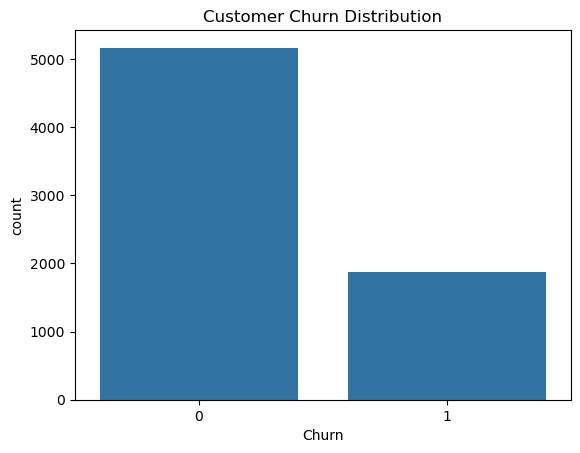

Churn rate: 0.26578498293515357


In [29]:
#explore churn rates
sns.countplot(x="Churn", data=df)
plt.title("Customer Churn Distribution")
plt.show()

print("Churn rate:", df["Churn"].mean())

In [30]:
# Convert categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [31]:
# Split features and target
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)

(5625, 7061)


## Random Forest Model

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:",
      accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.7896233120113717


## 4. Model evaluation

In [44]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.7896233120113717
              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1033
           1       0.66      0.44      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.77      1407



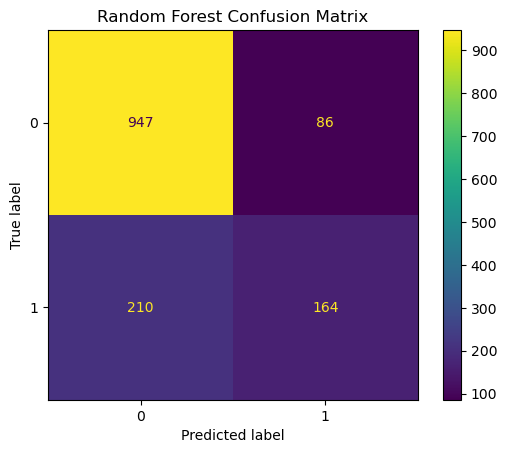

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred)

plt.title("Random Forest Confusion Matrix")

plt.show()


## Feature Importance

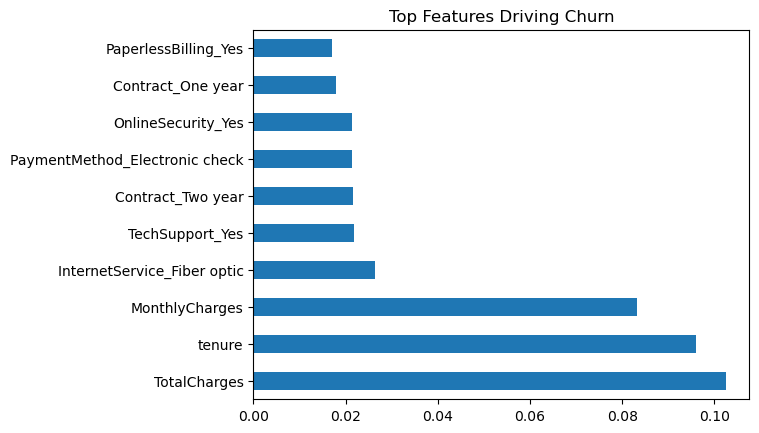

In [34]:
importances = model.feature_importances_

feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names)

feat_imp.nlargest(10).plot(kind="barh")

plt.title("Top Features Driving Churn")
plt.show()

## Logistic Regression Model (Scaled)

## Feature Scaling

Feature scaling was applied using StandardScaler to improve the convergence and performance of Logistic Regression, which is sensitive to feature magnitude.


In [37]:
#scaling features to help the regression model to work
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=2000)

log_model.fit(X_train_scaled, y_train)

log_pred = log_model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, log_pred))


Logistic Regression Accuracy: 0.7789623312011372


## Logistic Regression Confusion Matrix


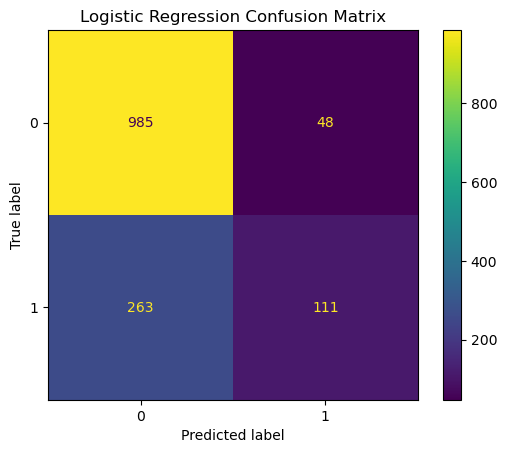

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, log_pred)

plt.title("Logistic Regression Confusion Matrix")

plt.show()


## ROC Curve and Model Performance


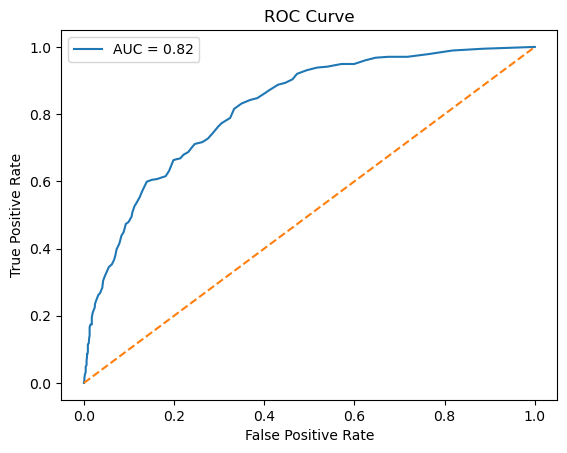

In [47]:
y_probs = rf_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

roc_auc = auc(fpr, tpr)

plt.figure()

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")

plt.plot([0,1],[0,1],'--')

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.title("ROC Curve")

plt.legend()

plt.show()


## Model Comparison

Both Random Forest and Logistic Regression performed well.

Random Forest captured more complex relationships and provided feature importance insights.

Logistic Regression provided a simpler, interpretable baseline model.

Random Forest showed marginally stronger predictive performance overall.


## Business Conclusion

The model successfully predicts customer churn with strong accuracy.

Key drivers of churn include tenure, and monthly charges.

This model could be used in production to identify at-risk customers and enable proactive retention strategies, reducing revenue loss.
